In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df=pd.read_csv("/Users/sunrise/Documents/Data Science Job Salaries/ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


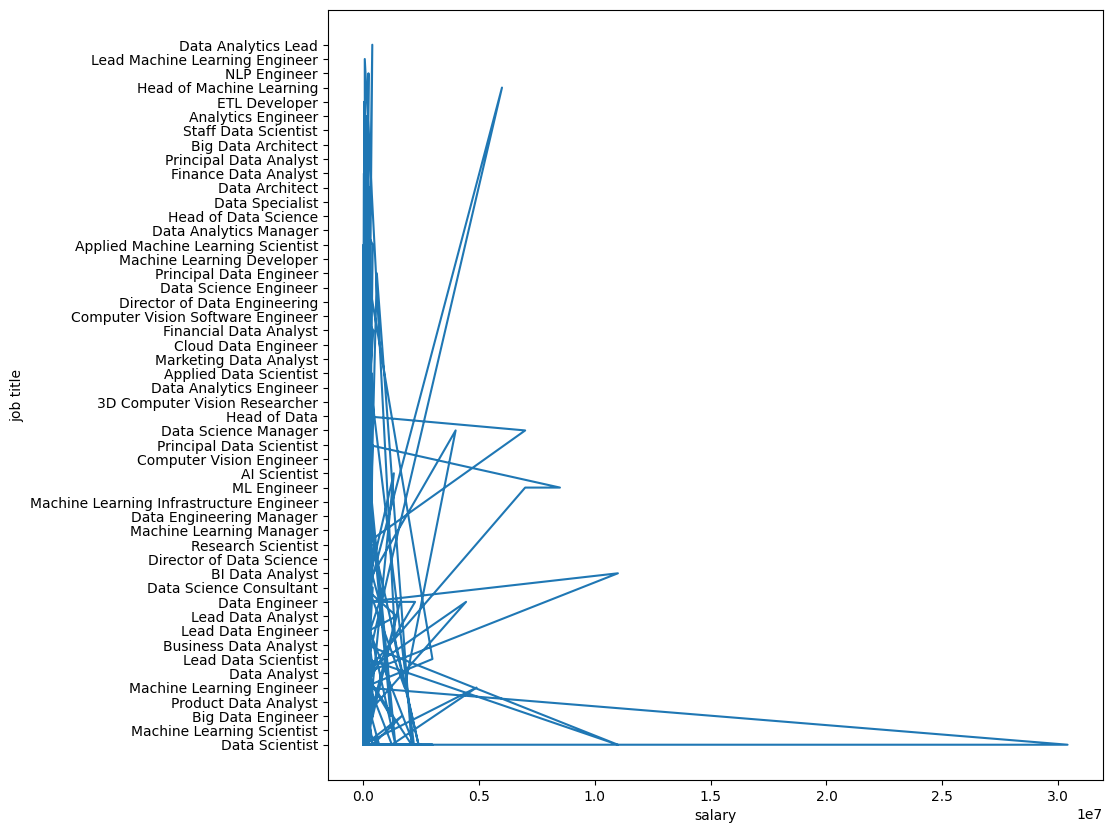

In [86]:

x=df['salary']
y=df['job_title']
plt.figure(figsize=(10,10))
plt.xlabel("salary")
plt.ylabel("job title")
plt.plot(x,y)


In [49]:
df.isnull().count()

Unnamed: 0            607
work_year             607
experience_level      607
employment_type       607
job_title             607
salary                607
salary_currency       607
salary_in_usd         607
employee_residence    607
remote_ratio          607
company_location      607
company_size          607
dtype: int64

In [87]:
#here i have converted all the entries on lower case because it might have give some inconsistency to the data set we have standerized the text
df['job_title']=(df['job_title'].str.lower().str.strip())


In [88]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='str')

In [89]:
print(df.info())
df.describe(include='all')

<class 'pandas.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Unnamed: 0          607 non-null    int64
 1   work_year           607 non-null    int64
 2   experience_level    607 non-null    str  
 3   employment_type     607 non-null    str  
 4   job_title           607 non-null    str  
 5   salary              607 non-null    int64
 6   salary_currency     607 non-null    str  
 7   salary_in_usd       607 non-null    int64
 8   employee_residence  607 non-null    str  
 9   remote_ratio        607 non-null    int64
 10  company_location    607 non-null    str  
 11  company_size        607 non-null    str  
dtypes: int64(5), str(7)
memory usage: 57.0 KB
None


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.000000,607.000000,607,607,607,6.070000e+02,607,607.000000,607,607.00000,607,607
unique,NaN,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,NaN,SE,FT,data scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,NaN,280,588,143,NaN,398,NaN,332,NaN,355,326
mean,303.000000,2021.405272,NaN,NaN,NaN,3.240001e+05,NaN,112297.869852,NaN,70.92257,NaN,NaN
std,175.370085,0.692133,NaN,NaN,NaN,1.544357e+06,NaN,70957.259411,NaN,40.70913,NaN,NaN
min,0.000000,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.00000,NaN,NaN
25%,151.500000,2021.000000,NaN,NaN,NaN,7.000000e+04,NaN,62726.000000,NaN,50.00000,NaN,NaN
50%,303.000000,2022.000000,NaN,NaN,NaN,1.150000e+05,NaN,101570.000000,NaN,100.00000,NaN,NaN
75%,454.500000,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.00000,NaN,NaN


In [90]:
# by here all the changes we have done results in these following goals
#Clean salary data , Standardized categories , Ordered experience levels, Analysis-ready DataFrame


<Axes: xlabel='experience_level'>

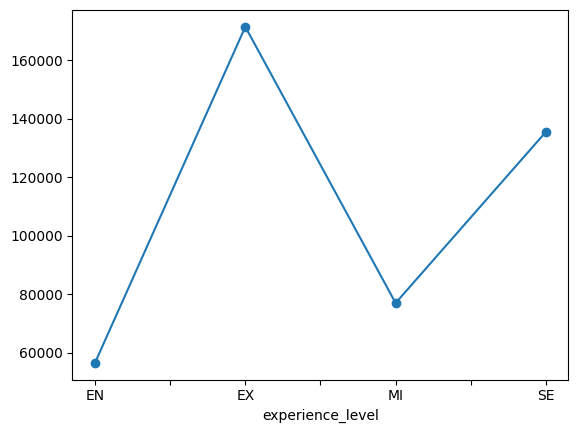

In [95]:
exp_salary = df.groupby("experience_level")['salary_in_usd'].median()

exp_salary.plot(kind="line", marker="o")

<Axes: xlabel='job_title', ylabel='salary_in_usd'>

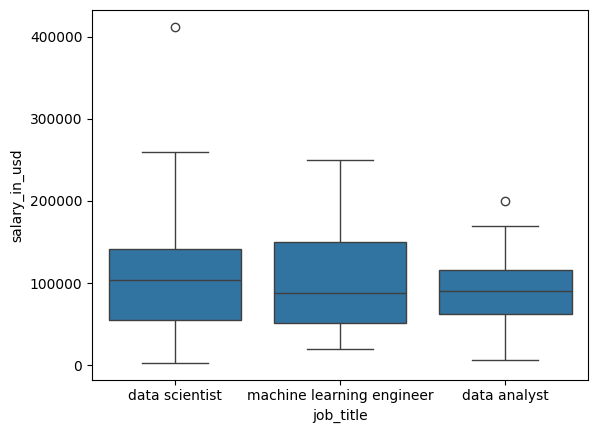

In [101]:
roles = ["Data Analyst", "Data Scientist", "Machine Learning Engineer"]
role_df = df[df["job_title"].isin([r.lower() for r in roles])]
sns.boxplot(
    data=role_df,
    x="job_title",
    y="salary_in_usd"
)


<Axes: xlabel='company_size', ylabel='salary_in_usd'>

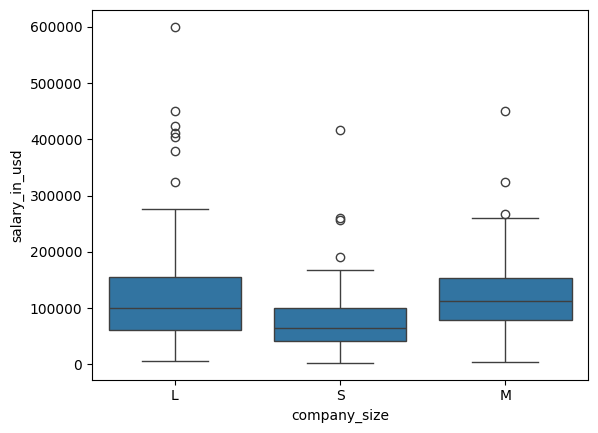

In [102]:
# does large companies actually pay more
sns.boxplot(data=df,x='company_size',y='salary_in_usd')

In [103]:
df.groupby("company_size")["salary_in_usd"].var()


company_size
L    7.422984e+09
M    3.515031e+09
S    4.027388e+09
Name: salary_in_usd, dtype: float64

<Axes: xlabel='company_location', ylabel='salary_in_usd'>

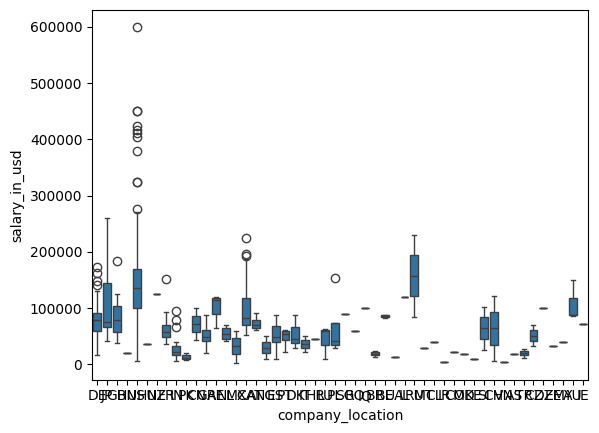

In [104]:
sns.boxplot(data=df,x='company_location',y='salary_in_usd')

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

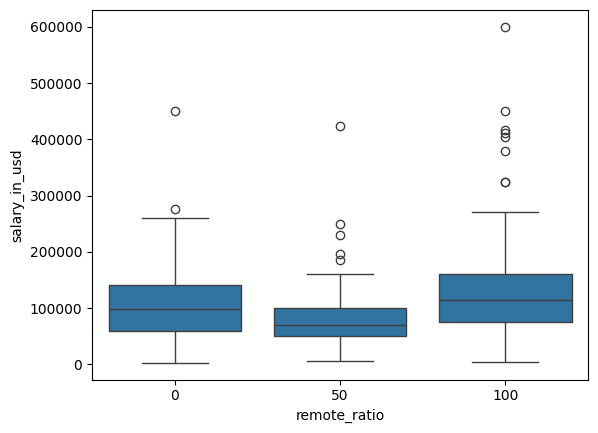

In [105]:
#remote focused pay hypothesis
sns.boxplot(
    data=df,
    x="remote_ratio",
    y="salary_in_usd"
)


<Axes: xlabel='employment_type', ylabel='salary_in_usd'>

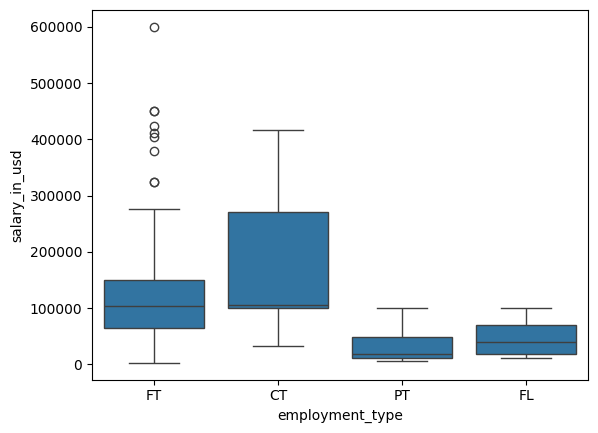

In [106]:
sns.boxplot(data=df,x='employment_type',y='salary_in_usd')

<Axes: xlabel='company_size', ylabel='experience_level'>

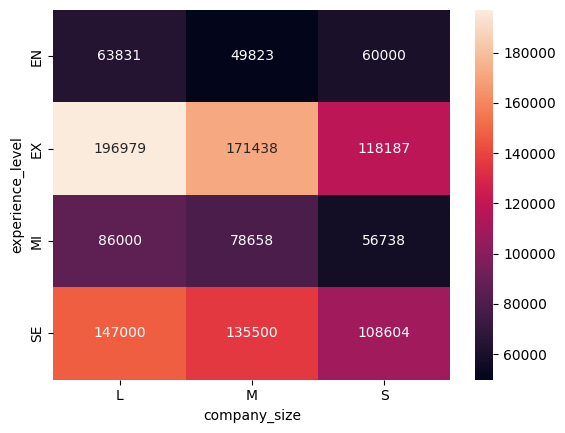

In [107]:
pivot = df.pivot_table(
    values="salary_in_usd",
    index="experience_level",
    columns="company_size",
    aggfunc="median"
)

sns.heatmap(pivot, annot=True, fmt=".0f")


In [115]:
mean_salary = df["salary_in_usd"].mean()
median_salary = df["salary_in_usd"].median()
skewness = df["salary_in_usd"].skew()

print("this is the mean of the salary- ",mean_salary,"\nthis is the median of the salary- ",median_salary, "\nthis is the skewness- ",skewness)


this is the mean of the salary-  112297.86985172982 
this is the median of the salary-  101570.0 
this is the skewness-  1.667544954563863


In [118]:
# percentile based benchmarking
salary_band=df.groupby('job_title')['salary_in_usd'].quantile([.25,.5,.75]).unstack().rename(columns={0.25: "P25", 0.5: "P50", 0.75: "P75"})
salary_band.head(10)

,P25,P50,P75
job_title,,,
3D Computer Vision Researcher,5409.00,5409.0,5409.0
AI Scientist,15026.50,45896.0,87500.0
Analytics Engineer,165000.00,179850.0,189850.0
Applied Data Scientist,110037.00,157000.0,177000.0
Applied Machine Learning Scientist,36768.75,56700.0,162000.0
BI Data Analyst,40944.25,76500.0,99500.0
Big Data Architect,99703.00,99703.0,99703.0
Big Data Engineer,17557.00,41305.5,79756.0
Business Data Analyst,59102.00,70912.0,100000.0


<Axes: xlabel='experience_level'>

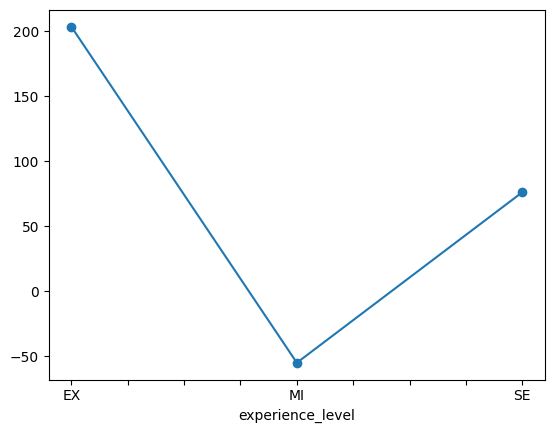

In [124]:
#career progression mapping
growth_rate = exp_salary.pct_change() * 100
growth_rate.plot(kind="line", marker="o")


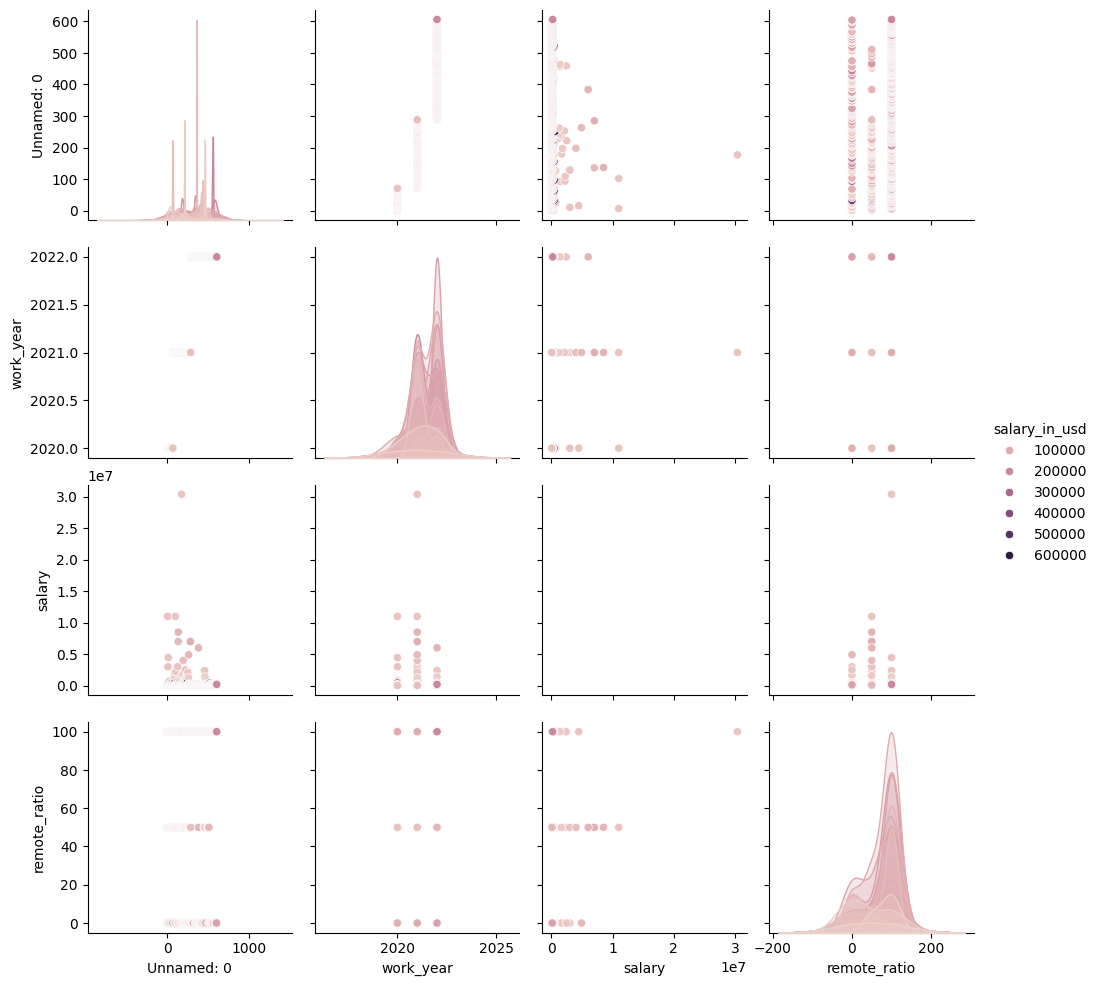

In [125]:
sns.pairplot(df,hue="salary_in_usd")

In [ ]:
"Salary growth from Senior to Executive is non-linear and highly selective, indicating diminishing marginal returns for tenure alone without role expansion."